# Duckietown NCTU - Tutorial 7: RANSAC + ICP

By Nick Wang

## Import Packages

In [2]:
import numpy as np
import scipy as sp
import cv2
import time
from matplotlib import pyplot as plt

from skimage.measure import LineModelND, ransac

%matplotlib inline
# set display defaults
plt.rcParams['figure.figsize'] = (10, 10)        # large images
plt.rcParams['image.interpolation'] = 'nearest'  # don't interpolate: show square pixels

## RANSAC Examples

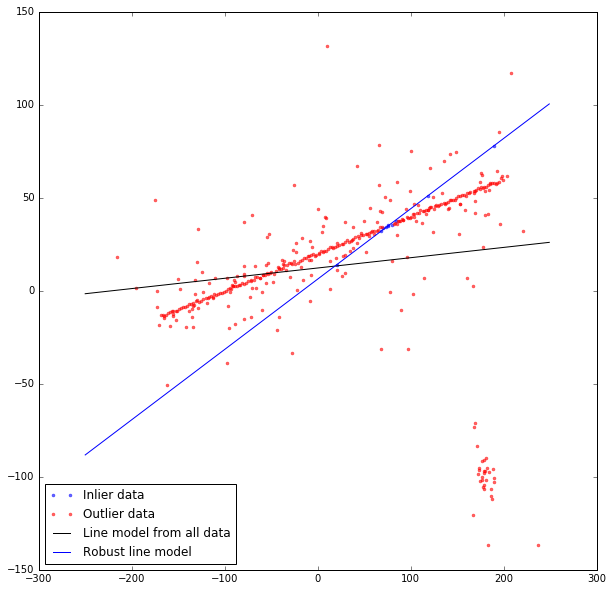

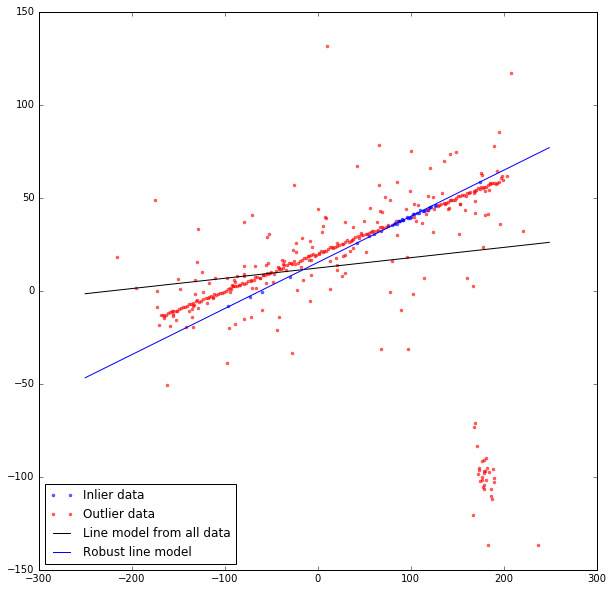

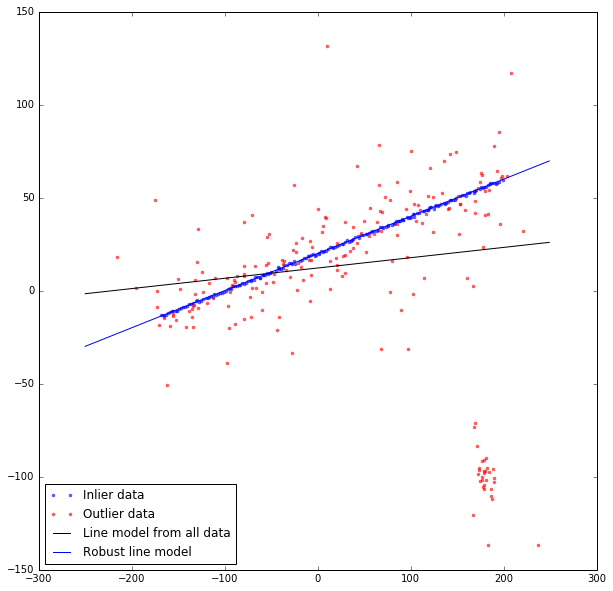

In [3]:

np.random.seed(seed=1)

# generate coordinates of line
x = np.arange(-200, 200)
y = 0.2 * x + 20
data = np.column_stack([x, y])

# add faulty data
faulty = np.array(30 * [(180., -100)])
faulty += 5 * np.random.normal(size=faulty.shape)
data[:faulty.shape[0]] = faulty

# add gaussian noise to coordinates
noise = np.random.normal(size=data.shape)
data += 0.5 * noise
data[::2] += 5 * noise[::2]
data[::4] += 20 * noise[::4]

# fit line using all data
model = LineModelND()
model.estimate(data)

for i in [1, 5, 10]:
    
    # robustly fit line only using inlier data with RANSAC algorithm
    model_robust, inliers = ransac(data, LineModelND, min_samples=2, residual_threshold=1, max_trials=i)
    outliers = inliers == False

    # generate coordinates of estimated models
    line_x = np.arange(-250, 250)
    line_y = model.predict_y(line_x)
    line_y_robust = model_robust.predict_y(line_x)

    fig, ax = plt.subplots()
    ax.plot(data[inliers, 0], data[inliers, 1], '.b', alpha=0.6,
            label='Inlier data')
    ax.plot(data[outliers, 0], data[outliers, 1], '.r', alpha=0.6,
            label='Outlier data')
    ax.plot(line_x, line_y, '-k', label='Line model from all data')
    ax.plot(line_x, line_y_robust, '-b', label='Robust line model')
    ax.legend(loc='lower left')
    plt.show()
    

## ICP Exercise

In this exercise you will use a standard ICP algorithm with the point-to-point distance metric to estimate the transform between the 2D datasets (model - red and target - green) depicted in the below figure. For the correspondence estimation please use the nearest neighbor search with the maximum radius set to 4 grid units.

[0, 18, 0, 18]

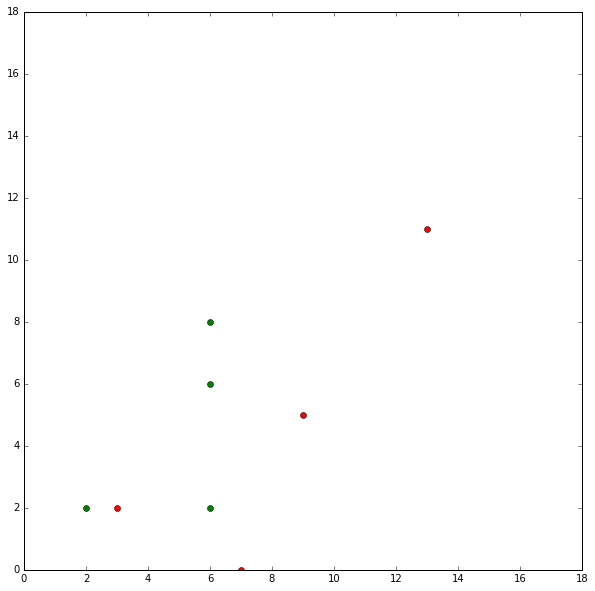

In [17]:
plt.plot([3,7,9,13], [2,0,5,11], 'ro')
plt.plot([2,6,6,6], [2,2,6,8], 'go')
plt.axis([0, 18, 0, 18])

### 1. Find Point Pairs. You should be careful about the NN search radius, and reject outlier.

In [11]:
p_1t = np.array([2, 2], dtype='f')
p_2t = np.array([6, 2], dtype='f')
p_3t = np.array([6, 6], dtype='f')
p_ct = (p_1t + p_2t + p_3t)/3
print p_ct

p_1m = np.array([3, 2], dtype='f')
p_2m = np.array([7, 0], dtype='f')
p_3m = np.array([9, 5], dtype='f')
p_cm = (p_1m + p_2m + p_3m)/3
print p_cm

[ 4.66666651  3.33333325]
[ 6.33333349  2.33333325]


### 2. Compute Centroids

### 3. Build the Correlation Matrix H

### 4. Estimate Rotation Matrix R using SVD

### 5. Estimate the translation vector t

### 6. Calculate the transform T

### 7. Transform Dataset m using the transform T